# Load libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load data

In [5]:
data = pd.read_csv("ML_Models/Propietary_Models/token_datasets.csv")
data.head()

,Posts,label,tokenized_text,filtered_text,lemmatized_text
0,so my mum is textbook abusive but not often en...,Positive,"['so', 'my', 'mum', 'is', 'textbook', 'abusive...","['mum', 'textbook', 'abusive', 'often', 'enoug...","['mum', 'textbook', 'abusive', 'often', 'enoug..."
1,hello i have never made a reddit post before b...,Depression/Suicidal Thoughts,"['hello', 'i', 'have', 'never', 'made', 'a', '...","['hello', 'never', 'made', 'reddit', 'post', '...","['hello', 'never', 'made', 'reddit', 'post', '..."
2,i m have tried to be nice to my parents and su...,Positive,"['i', 'm', 'have', 'tried', 'to', 'be', 'nice'...","['tried', 'nice', 'parents', 'support', 'years...","['tried', 'nice', 'parent', 'support', 'year',..."
3,i need some advice it will be a bit long but i...,Depression/Suicidal Thoughts,"['i', 'need', 'some', 'advice', 'it', 'will', ...","['need', 'advice', 'bit', 'long', 'necessary',...","['need', 'advice', 'bit', 'long', 'necessary',..."
4,hello im f from the ph with no close friends o...,Neutral,"['hello', 'im', 'f', 'from', 'the', 'ph', 'wit...","['hello', 'im', 'f', 'ph', 'close', 'friends',...","['hello', 'im', 'f', 'ph', 'close', 'friend', ..."


In [6]:
data = data.drop(['Posts','tokenized_text','filtered_text'], axis=1)
data.head()

,label,lemmatized_text
0,Positive,"['mum', 'textbook', 'abusive', 'often', 'enoug..."
1,Depression/Suicidal Thoughts,"['hello', 'never', 'made', 'reddit', 'post', '..."
2,Positive,"['tried', 'nice', 'parent', 'support', 'year',..."
3,Depression/Suicidal Thoughts,"['need', 'advice', 'bit', 'long', 'necessary',..."
4,Neutral,"['hello', 'im', 'f', 'ph', 'close', 'friend', ..."


# Word Vectorization

In [7]:
vectorizer = CountVectorizer()
vec_transformed = vectorizer.fit_transform(data.lemmatized_text)
DocTermMatrix = pd.DataFrame(vec_transformed.toarray(), columns=vectorizer.get_feature_names_out())
DocTermMatrix.head()

,aaaaa,aaaand,aaahhhhhh,aaron,ab,aba,aback,abandon,abandoned,abandoning,...,zoim,zombie,zomble,zone,zoned,zoning,zoo,zookeepers,zoom,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Label re-encoding

In [8]:
labelling = data.iloc[:,0]
labelling.head(10)

0                        Positive
1    Depression/Suicidal Thoughts
2                        Positive
3    Depression/Suicidal Thoughts
4                         Neutral
5                        Positive
6                         Neutral
7                        Positive
8                        Positive
9                        Positive
Name: label, dtype: object

In [9]:
labelEncoder = LabelEncoder()
labelling_transformed = labelEncoder.fit_transform(labelling)

In [10]:
labelling_transformed[:10]

array([2, 0, 2, 0, 1, 2, 1, 2, 2, 2])

In [11]:
list(labelEncoder.classes_)

['Depression/Suicidal Thoughts', 'Neutral', 'Positive']

# Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(DocTermMatrix, labelling_transformed,
                                                    test_size=1/3, random_state=42)

In [13]:
unique_values, counts = np.unique(y_train, return_counts=True)

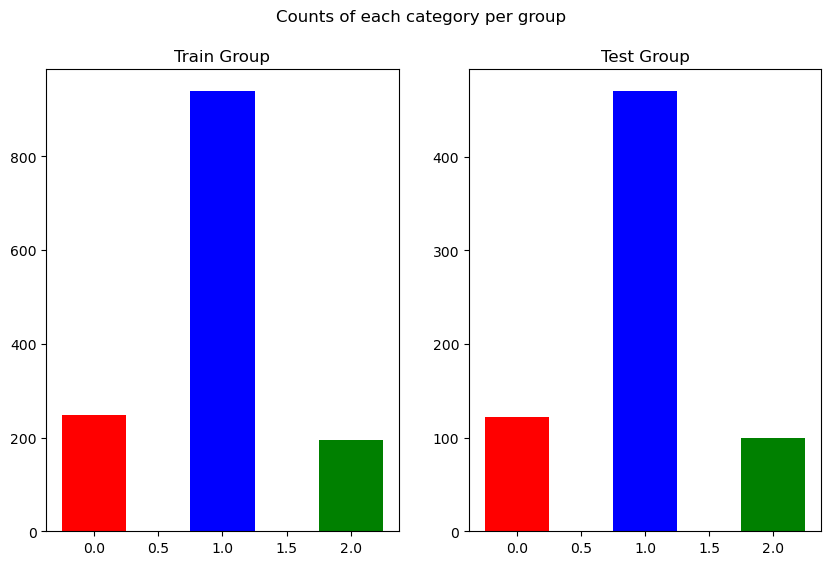

In [14]:
plt.figure(figsize=(10,6))
plt.suptitle("Counts of each category per group")
plt.subplot(121)
unique_values, counts = np.unique(y_train, return_counts=True)
plt.bar(unique_values, counts, width = 0.5,
        color = ["red", "blue", "green"])
plt.title("Train Group")

plt.subplot(122)
unique_values, counts = np.unique(y_test, return_counts=True)
plt.bar(unique_values, counts, width = 0.5,
        color = ["red", "blue", "green"])
plt.title("Test Group")

plt.show()

## Save the data groups

In [15]:
X_train.to_csv('ML_Models/Propietary_Models/X_train.csv', sep=',', header=True, index=False)
X_test.to_csv('ML_Models/Propietary_Models/X_test.csv', sep=',', header=True, index=False)
y_train.tofile('ML_Models/Propietary_Models/y_train.csv', sep=',')
y_test.tofile('ML_Models/Propietary_Models/y_test.csv', sep=',')

# Model Training

## Load files

In [16]:
X_train = pd.read_csv('ML_Models/Propietary_Models/X_train.csv')
X_test = pd.read_csv('ML_Models/Propietary_Models/X_test.csv')
y_train = np.loadtxt('ML_Models/Propietary_Models/y_train.csv', delimiter=',', dtype=int)
y_test = np.loadtxt('ML_Models/Propietary_Models/y_test.csv', delimiter=',', dtype=int)

## Building the models

### Logistic Regression

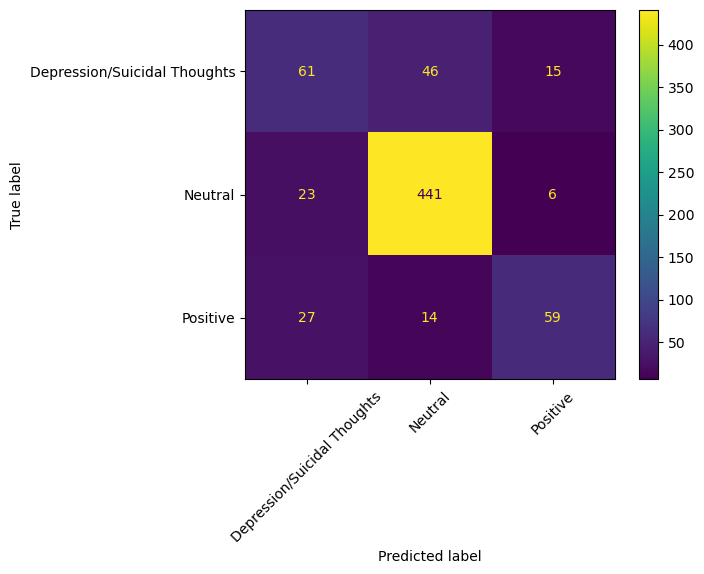

Accuracy:  0.8106936416184971
              precision    recall  f1-score   support

           0       0.55      0.50      0.52       122
           1       0.88      0.94      0.91       470
           2       0.74      0.59      0.66       100

    accuracy                           0.81       692
   macro avg       0.72      0.68      0.70       692
weighted avg       0.80      0.81      0.80       692



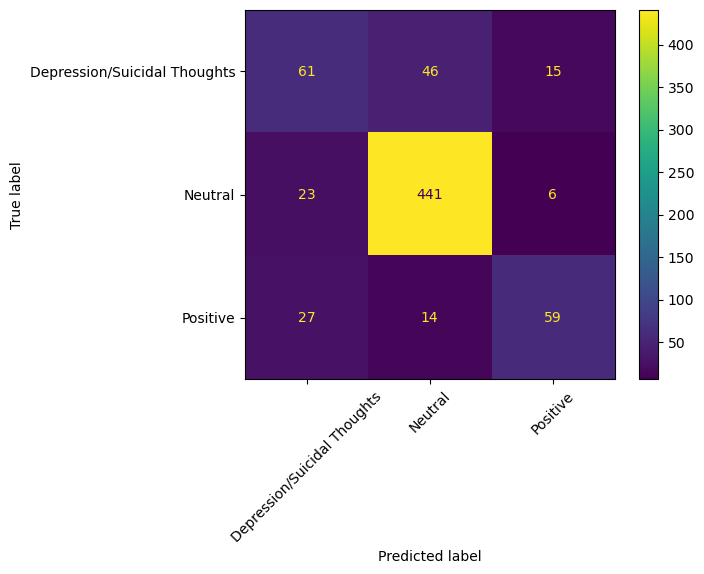

Accuracy:  0.8106936416184971
              precision    recall  f1-score   support

           0       0.55      0.50      0.52       122
           1       0.88      0.94      0.91       470
           2       0.74      0.59      0.66       100

    accuracy                           0.81       692
   macro avg       0.72      0.68      0.70       692
weighted avg       0.80      0.81      0.80       692



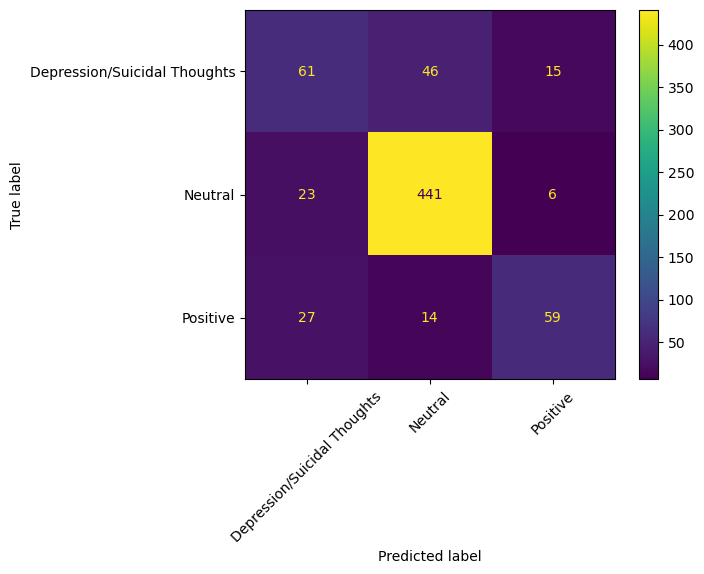

Accuracy:  0.8106936416184971
              precision    recall  f1-score   support

           0       0.55      0.50      0.52       122
           1       0.88      0.94      0.91       470
           2       0.74      0.59      0.66       100

    accuracy                           0.81       692
   macro avg       0.72      0.68      0.70       692
weighted avg       0.80      0.81      0.80       692



In [51]:
max_iter = [100, 500, 3000]

for iter in max_iter:
    # Building the model
    LogRegModel = LogisticRegression(max_iter=iter, random_state=0)
    LogRegModel.fit(X_train, y_train)
    LogReg_pred = LogRegModel.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, LogReg_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['Depression/Suicidal Thoughts', 'Neutral',
                                                      'Positive'])
    cm_display.plot()
    plt.xticks(rotation=45)
    plt.show()

    # Scores
    print("Accuracy: ", accuracy_score(y_test, LogReg_pred))
    print(classification_report(y_test, LogReg_pred))

### kNN

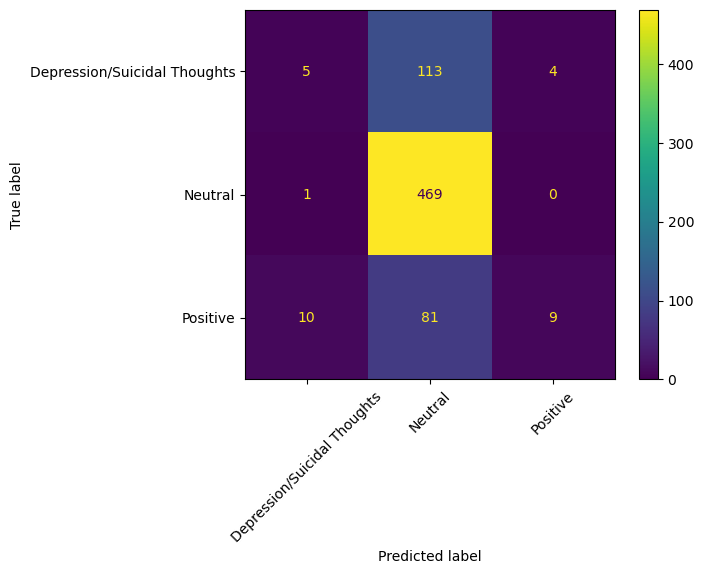

Accuracy:  0.6979768786127167
              precision    recall  f1-score   support

           0       0.31      0.04      0.07       122
           1       0.71      1.00      0.83       470
           2       0.69      0.09      0.16       100

    accuracy                           0.70       692
   macro avg       0.57      0.38      0.35       692
weighted avg       0.64      0.70      0.60       692



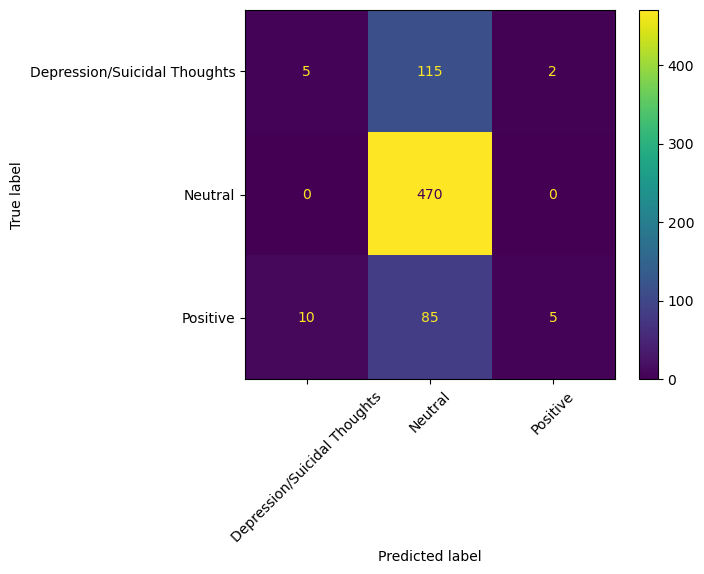

Accuracy:  0.6936416184971098
              precision    recall  f1-score   support

           0       0.33      0.04      0.07       122
           1       0.70      1.00      0.82       470
           2       0.71      0.05      0.09       100

    accuracy                           0.69       692
   macro avg       0.58      0.36      0.33       692
weighted avg       0.64      0.69      0.59       692



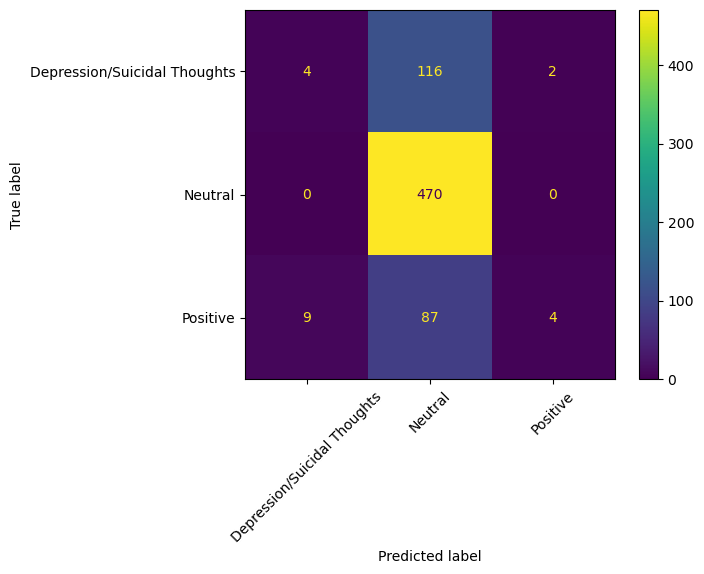

Accuracy:  0.6907514450867052
              precision    recall  f1-score   support

           0       0.31      0.03      0.06       122
           1       0.70      1.00      0.82       470
           2       0.67      0.04      0.08       100

    accuracy                           0.69       692
   macro avg       0.56      0.36      0.32       692
weighted avg       0.62      0.69      0.58       692



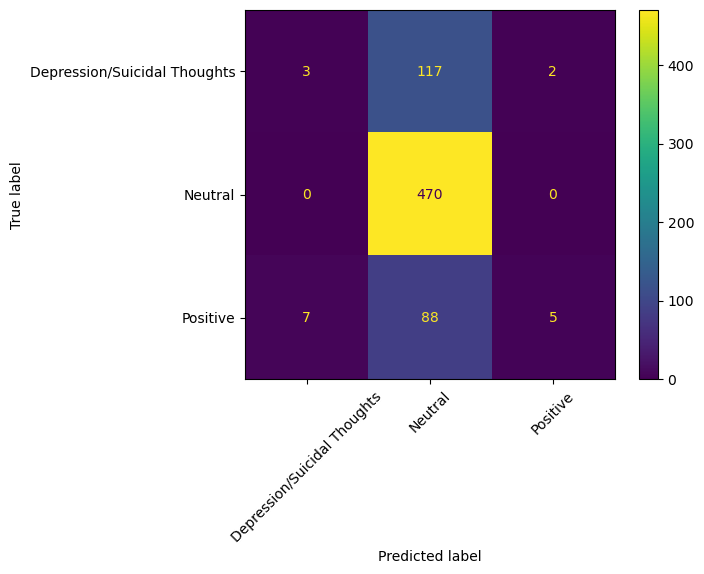

Accuracy:  0.6907514450867052
              precision    recall  f1-score   support

           0       0.30      0.02      0.05       122
           1       0.70      1.00      0.82       470
           2       0.71      0.05      0.09       100

    accuracy                           0.69       692
   macro avg       0.57      0.36      0.32       692
weighted avg       0.63      0.69      0.58       692



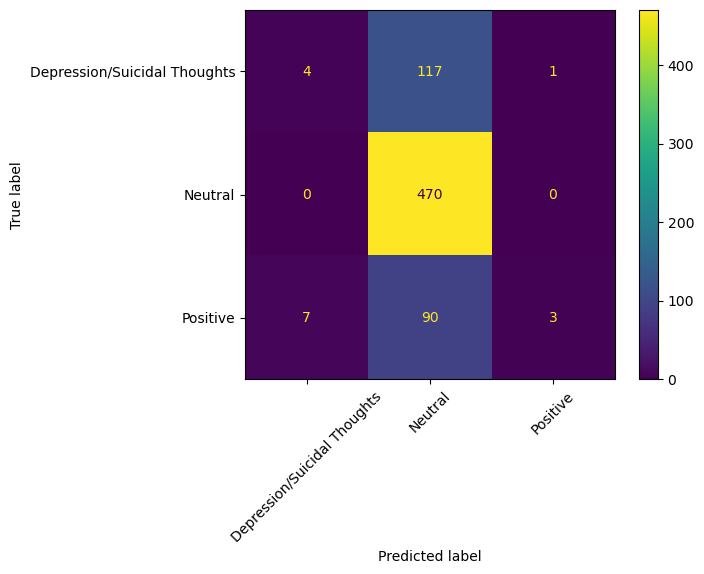

Accuracy:  0.6893063583815029
              precision    recall  f1-score   support

           0       0.36      0.03      0.06       122
           1       0.69      1.00      0.82       470
           2       0.75      0.03      0.06       100

    accuracy                           0.69       692
   macro avg       0.60      0.35      0.31       692
weighted avg       0.64      0.69      0.58       692



In [52]:
neighbors = [10, 30, 80, 100, 150]

for neighbor in neighbors:
    # Build the model
    kNN_model = KNeighborsClassifier(n_neighbors=neighbor)
    kNN_model.fit(X_train, y_train)
    kNN_pred = kNN_model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, kNN_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['Depression/Suicidal Thoughts', 'Neutral',
                                                      'Positive'])
    cm_display.plot()
    plt.xticks(rotation=45)
    plt.show()

    # Scores
    print("Accuracy: ", accuracy_score(y_test, kNN_pred))
    print(classification_report(y_test, kNN_pred))

### Gaussian Naive Bayes

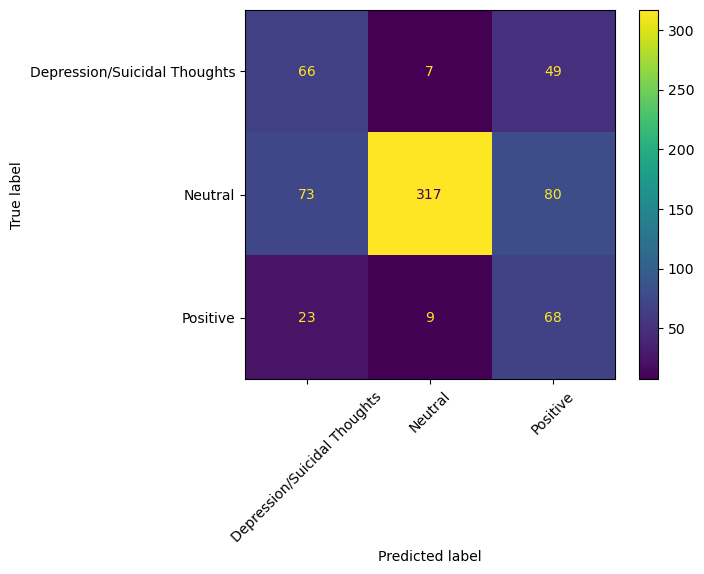

Accuracy:  0.6517341040462428
              precision    recall  f1-score   support

           0       0.41      0.54      0.46       122
           1       0.95      0.67      0.79       470
           2       0.35      0.68      0.46       100

    accuracy                           0.65       692
   macro avg       0.57      0.63      0.57       692
weighted avg       0.77      0.65      0.68       692



In [53]:
# Build the model
NBModel = GaussianNB()
NBModel.fit(X_train, y_train)
NB_pred = NBModel.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, NB_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['Depression/Suicidal Thoughts', 'Neutral',
                                                      'Positive'])
cm_display.plot()
plt.xticks(rotation=45)
plt.show()

# Scores
print("Accuracy: ", accuracy_score(y_test, NB_pred))
print(classification_report(y_test, NB_pred))

### Decision Trees

In [73]:
# Parameters to test
criterion = ['gini', 'entropy', 'log_loss']*7
max_depth = [1,2,5,10,15,25,50]*3
df = pd.DataFrame({'criterion': criterion, 
                   'max_depth': max_depth})
acc = []

for i in range(len(df['criterion'])):
    # Building the model
    Trees = DecisionTreeClassifier(criterion=df.iloc[i,0], max_depth=df.iloc[i,1], random_state=0)
    Trees.fit(X_train, y_train)
    Trees_pred = Trees.predict(X_test)

    # Scores
    acc += [accuracy_score(y_test, Trees_pred)]

# Get accuracy
df['accuracy'] = acc
print(df.head(3).sort_values(by=['accuracy'], ascending=False, ignore_index=True))
Trees_best = df.head(3).sort_values(by=['accuracy'], ascending=False, ignore_index=True)

  criterion  max_depth  accuracy
0  log_loss          5  0.839595
1   entropy          2  0.790462
2      gini          1  0.728324


Accuracy:  0.8395953757225434
              precision    recall  f1-score   support

           0       0.63      0.48      0.54       122
           1       0.85      0.94      0.89       470
           2       1.00      0.80      0.89       100

    accuracy                           0.84       692
   macro avg       0.83      0.74      0.78       692
weighted avg       0.83      0.84      0.83       692



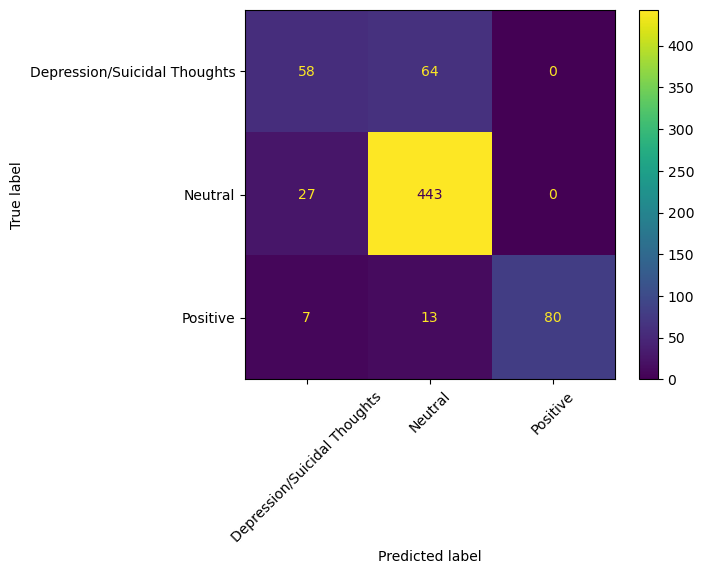

Accuracy:  0.7904624277456648
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.76      1.00      0.87       470
           2       1.00      0.77      0.87       100

    accuracy                           0.79       692
   macro avg       0.59      0.59      0.58       692
weighted avg       0.66      0.79      0.71       692



c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


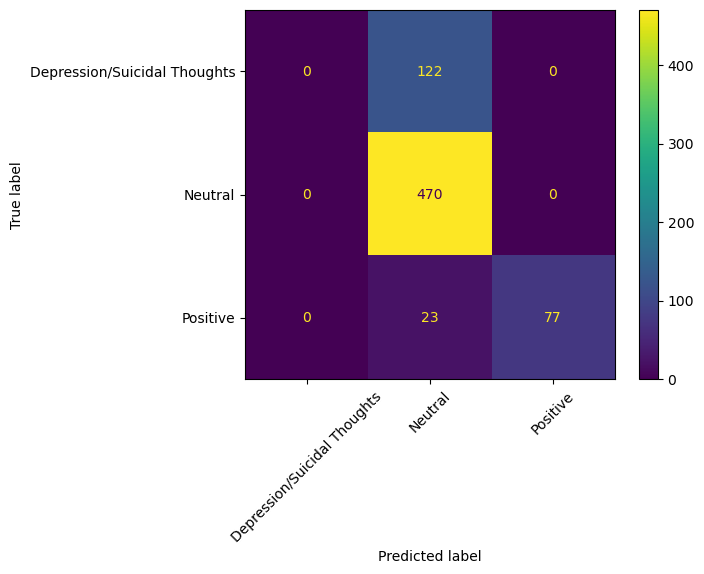

Accuracy:  0.7283236994219653
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.71      1.00      0.83       470
           2       1.00      0.34      0.51       100

    accuracy                           0.73       692
   macro avg       0.57      0.45      0.45       692
weighted avg       0.63      0.73      0.64       692



c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


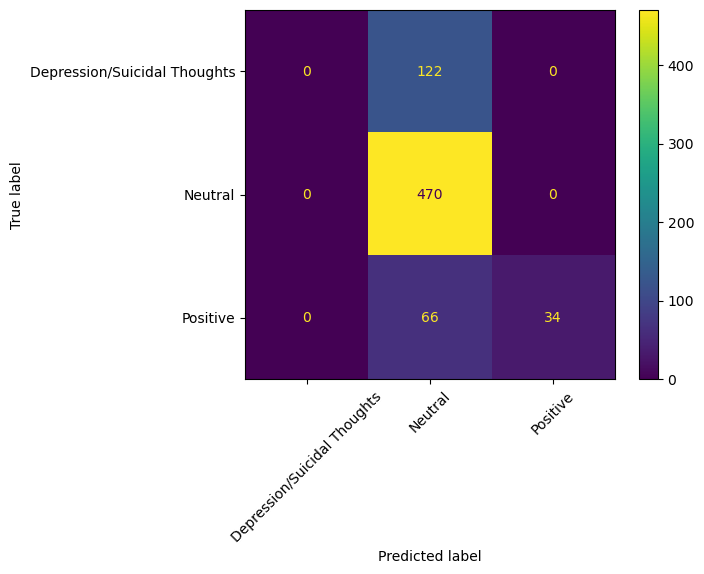

In [75]:
for i in range(len(Trees_best['criterion'])):
    # Building the model
    Trees = DecisionTreeClassifier(criterion=Trees_best.iloc[i,0], max_depth=Trees_best.iloc[i,1], 
                                   random_state=0)
    Trees.fit(X_train, y_train)
    Trees_pred = Trees.predict(X_test)

    # Scores
    print("Accuracy: ", accuracy_score(y_test, Trees_pred))
    print(classification_report(y_test, Trees_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, Trees_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['Depression/Suicidal Thoughts', 'Neutral',
                                                      'Positive'])
    cm_display.plot()
    plt.xticks(rotation=45)
    plt.show()

### Random Forest

In [80]:
# Parameters to test
n_estimators = [100, 200, 500, 1000, 3000, 5000, 9000]*(3*4)
criterion = ['gini', 'entropy', 'log_loss']*(7*4)
max_depth = [1,2,5,9]*(7*3)

df = pd.DataFrame({'n_estimators': n_estimators,
                   'criterion': criterion, 
                   'max_depth': max_depth})
acc = []

for i in range(len(df['criterion'])):
    # Building the model
    RdmForest = RandomForestClassifier(n_estimators=df.iloc[i,0], criterion=df.iloc[i,1],
                                       max_depth=df.iloc[i,2], random_state=0)
    RdmForest.fit(X_train, y_train)
    RdmForest_pred = RdmForest.predict(X_test)

    # Scores
    acc += [accuracy_score(y_test, RdmForest_pred)]

# Get accuracy
df['accuracy'] = acc
print(df.head(3).sort_values(by=['accuracy'], ascending=False, ignore_index=True))
RdmForest_best = df.head(3).sort_values(by=['accuracy'], ascending=False, ignore_index=True)

   n_estimators criterion  max_depth  accuracy
0           500  log_loss          5  0.721098
1           200   entropy          2  0.684971
2           100      gini          1  0.679191


Accuracy:  0.7210982658959537
              precision    recall  f1-score   support

           0       0.56      0.04      0.08       122
           1       0.72      1.00      0.84       470
           2       0.75      0.24      0.36       100

    accuracy                           0.72       692
   macro avg       0.68      0.43      0.43       692
weighted avg       0.70      0.72      0.64       692



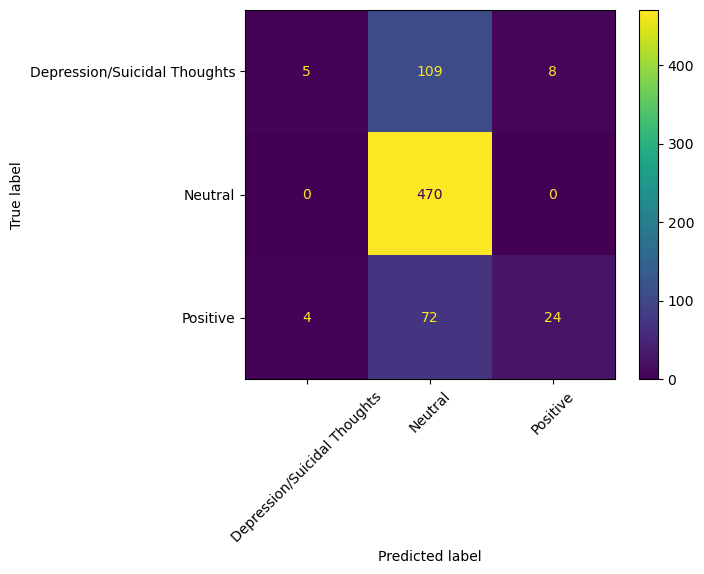

Accuracy:  0.684971098265896
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.69      1.00      0.81       470
           2       0.67      0.04      0.08       100

    accuracy                           0.68       692
   macro avg       0.45      0.35      0.30       692
weighted avg       0.56      0.68      0.56       692



c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


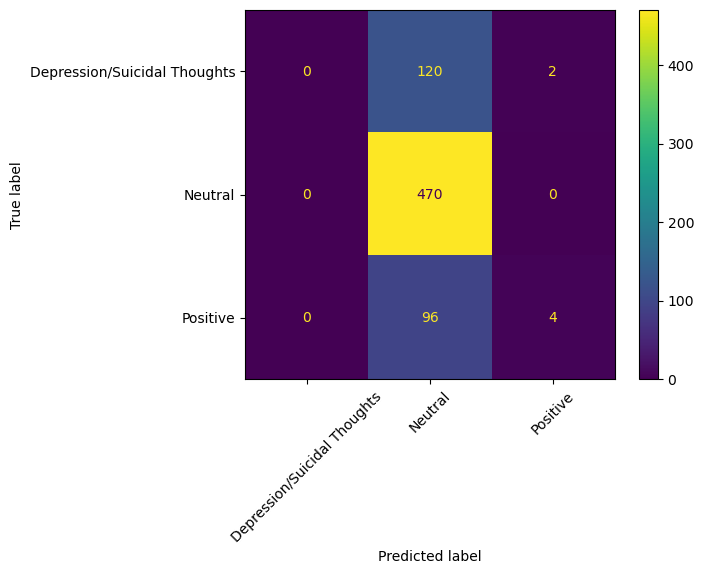

Accuracy:  0.6791907514450867
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.68      1.00      0.81       470
           2       0.00      0.00      0.00       100

    accuracy                           0.68       692
   macro avg       0.23      0.33      0.27       692
weighted avg       0.46      0.68      0.55       692



c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jordi\anaconda3\envs\MyEnv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


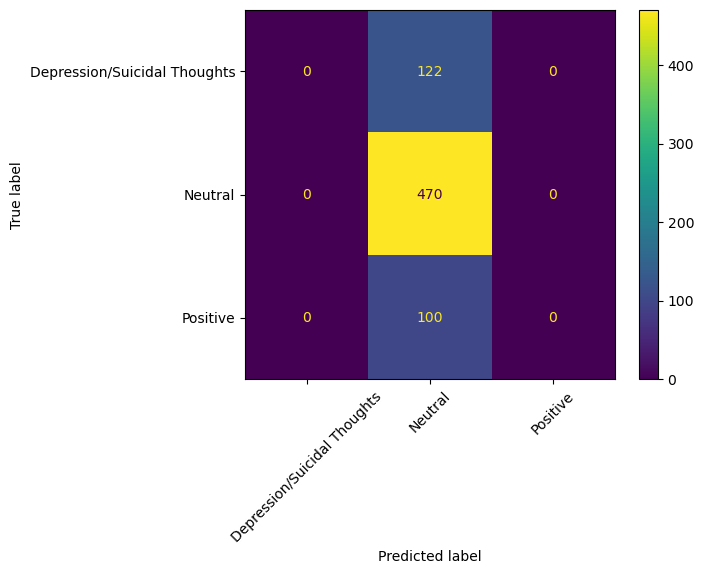

In [82]:
for i in range(len(RdmForest_best['criterion'])):
    # Building the model
    RdmForest = RandomForestClassifier(n_estimators=RdmForest_best.iloc[i,0],
                                       criterion=RdmForest_best.iloc[i,1],
                                       max_depth=RdmForest_best.iloc[i,2], random_state=0)
    RdmForest.fit(X_train, y_train)
    RdmForest_pred = RdmForest.predict(X_test)

    # Scores
    print("Accuracy: ", accuracy_score(y_test, RdmForest_pred))
    print(classification_report(y_test, RdmForest_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, RdmForest_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['Depression/Suicidal Thoughts', 'Neutral',
                                                      'Positive'])
    cm_display.plot()
    plt.xticks(rotation=45)
    plt.show()

# Conclusion

Decision trees with `criterion` = log_loss and `max_depth` = 5 yields with an accuracy of 0.839595, which is the best result he could get.

Best Model's Accuracy:  0.8395953757225434


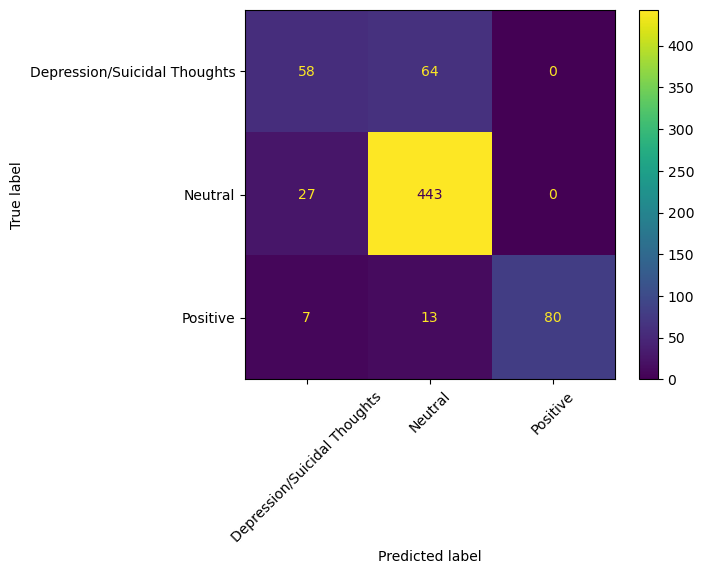

In [85]:
# Saving the model
best_classifier = DecisionTreeClassifier(criterion='log_loss', max_depth=5, random_state=0)
best_classifier.fit(X_train, y_train)
best_pred = best_classifier.predict(X_test)

# Score
print("Best Model's Accuracy: ", accuracy_score(y_test, best_pred))

# Confusion MAtrix
cm = confusion_matrix(y_test, best_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['Depression/Suicidal Thoughts', 'Neutral',
                                                      'Positive'])
cm_display.plot()
plt.xticks(rotation=45)
plt.show()

In [87]:
pickle.dump(best_classifier, open("ML_Models/Propietary_Models/best_tree_model.pickle", "wb"))